In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import utils  #useful to import the data )> to download from the class github

## Linear Regression :

In [4]:
data_path = '/Users/benjelloun/Documents/General_code/Hands_On_Tensorflow/data/birth_life_2010.txt'

# Step 1: Get the data == read in data from the .txt file
data, n_samples = utils.read_birth_life_data(data_path)
print('number of samples : ', n_samples)
print('\n \n')
print('small view of data : \n', data[:3, :])

number of samples :  190

 

small view of data : 
 [[ 1.822   74.82825]
 [ 3.869   70.81949]
 [ 3.911   72.15066]]


In [5]:
#######________ Create the graph :

## 1._ Create placeholders for X and Y :
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

## 2._ Variables of the model w and b : Y_pred = w*X + b
W = tf.get_variable("myvar_Weights", [1], initializer=tf.zeros_initializer)
b = tf.get_variable("myvar_Bias", [1], initializer=tf.zeros_initializer)

In [6]:
## 3._ Build the model :
Y_pred = tf.add( tf.multiply(W,X), b )

## 4._ Define the loss : Least square
loss = tf.square(Y - Y_pred, name='Loss')

## 5._ Optimisation method :
opt = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

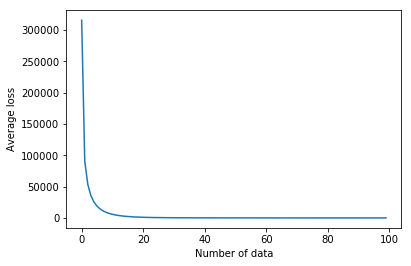


 

The final weights is :  [-6.0702143]
The final biais is :  [84.92951]


In [16]:
#######________ Training process :
writer = tf.summary.FileWriter('./graphs', tf.get_default_graph())
with tf.Session() as sess :
    
    ## 1._ Initialize the variables :
    sess.run(tf.global_variables_initializer())
    loss_per_data = []
    ## 2._ Train for 200 epochs :
    for i in range(100):
        
        total_loss = 0
        
        for x,y in data :
            ### !!!! Need to define loss_ wih name different than loss, otherwise error !!!!
            _, loss_ = sess.run([opt, loss], feed_dict={X:x, Y:y})
            total_loss += loss_
            
        loss_per_data.append([i,total_loss/(i+1)])
    writer.close()
    
    ## Plot the total loss per data
    loss_per_data = np.array(loss_per_data)
    plt.plot(loss_per_data[:,0], loss_per_data[:,1])
    plt.ylabel('Average loss')
    plt.xlabel('Number of data')
    plt.show()
    
    #print the final weights and biais
    print('\n \n')
    Weights = W.eval()
    biais   = b.eval()
    
print('The final weights is : ', Weights)
print('The final biais is : ', biais)

In [8]:
## Final model :

def Linear_regression_model(x):
    
    return Weights[0]*x + biais[0]

## Plot the result :

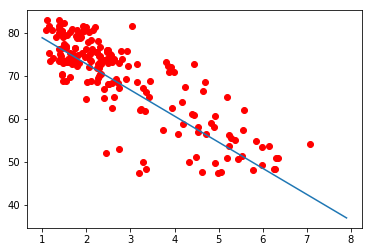

In [13]:
plt.plot(data[:,0], data[:,1], 'ro')
axis_ = np.arange(1,8, 0.1)
plt.plot(axis_, Linear_regression_model(axis_))
plt.show()

## Huber-Loss : 

Hubber loss is different than L2 loss, it treats the data differently depending on the error :

    - if Y - Y_pred is small, take the square L2 : |Y - Y_pred|^2
    - if Y - Y_pred is large take the absolute value : |Y - Y_pred|
    
 The mathematic expression is :
 
     $$ L_{\sigma}(y, f(x)) = \frac{1}{2} (y - f(x))^2 if |y - f(x)|< \sigma   $$
     
 else :
 
     $$ L_{\sigma}(y, f(x)) = \sigma |y - f(x)| - \frac{1}{2} \sigma^2 $$

In [14]:
def Huber_Loss(Y, Y_pred, sigma=14.0):
    
    diff = tf.abs(Y - Y_pred)
    
    def f1(): return 0.5*tf.square(diff)
    def f2(): return sigma*diff - 0.5*tf.square(sigma)
    
    return tf.cond(dif < sigma, f1, f2)